CS 539 Assignment 1 Question 2

Imports

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Access transaction_data

In [2]:
df_transaction = pd.read_csv("transaction_data.csv")

Display the first 5 rows

In [3]:
df_transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Generate summary statistics for each column

In [4]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Find and drop duplicate rows

In [5]:
duplicate_rows_df_transaction = df_transaction[df_transaction.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_transaction.shape)

number of duplicate rows:  (1, 8)


In [6]:
df_transaction = df_transaction.drop_duplicates()
df_transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Check the size of the dataframe

In [7]:
df_transaction.shape

(264835, 8)

Check the data for missing values

In [8]:
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Check data formats

In [9]:
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Check number of unique values

In [10]:
unique_values = df_transaction.nunique()
unique_values

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

Identify and remove outliers- first visualize using boxplots then calculate IQR

ignoring columns `Date`, `STORE_NBR`, `LYLTY_CARD_NBR`, `TXN_ID`, and `PROD_NBR` since those columns are identifiers and doesn't make sense to calculate outliers for them

<Axes: ylabel='PROD_QTY'>

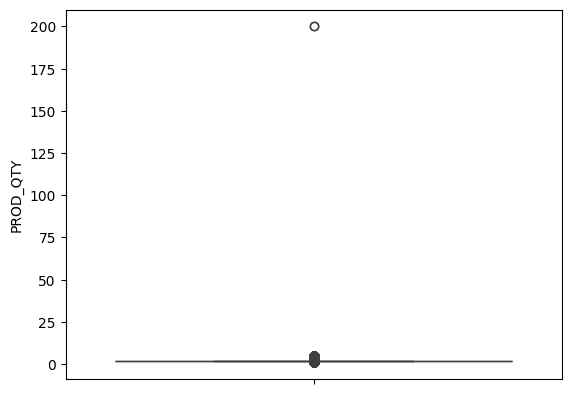

In [11]:
sns.boxplot(df_transaction['PROD_QTY'])

<Axes: ylabel='TOT_SALES'>

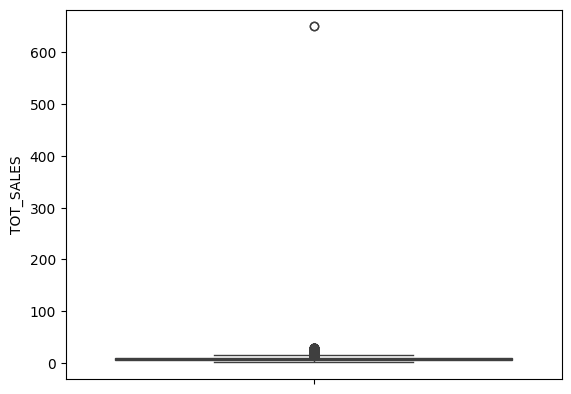

In [12]:
sns.boxplot(df_transaction['TOT_SALES'])

In [13]:
# Can see there are outliers at 200 for quantity and 650 for sales, want to remove those and then check for any other outliers
df_transaction = df_transaction[df_transaction['PROD_QTY'] != 200]
df_transaction = df_transaction[df_transaction['TOT_SALES'] != 650]


<Axes: ylabel='PROD_QTY'>

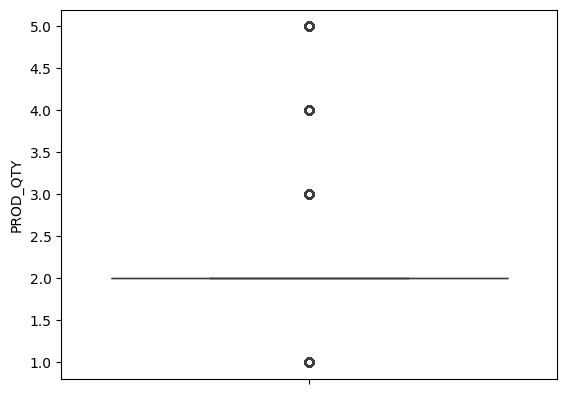

In [14]:
# Recheck the boxplots
sns.boxplot(df_transaction['PROD_QTY'])

<Axes: ylabel='TOT_SALES'>

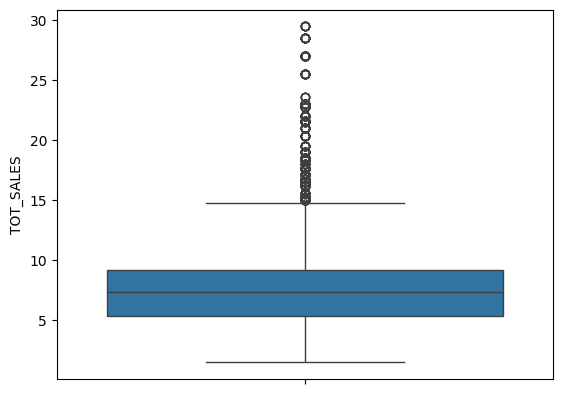

In [15]:
sns.boxplot(df_transaction['TOT_SALES'])

In [16]:
# Calculate the remaining outliers
outlier_columns = ['PROD_QTY', 'TOT_SALES']

# Calculate Q1, Q3, and IQR for each column
q1 = df_transaction[outlier_columns].quantile(0.25)
q3 = df_transaction[outlier_columns].quantile(0.75)
IQR = q3 - q1

# Find the outliers for each column
outliers = ((df_transaction[outlier_columns] < (q1 - 1.5 * IQR)) | (df_transaction[outlier_columns] > (q3 + 1.5 * IQR))).sum()

print("Number of outliers per column:\n", outliers)


Number of outliers per column:
 PROD_QTY     28795
TOT_SALES      576
dtype: int64


In [17]:
# Remove remaning outliers
# Get rows without outliers
non_outliers_rows = ~((df_transaction[outlier_columns] < (q1 - 1.5 * IQR)) | (df_transaction[outlier_columns] > (q3 + 1.5 * IQR))).any(axis=1)

# Filter to keep only non-outlier rows
df_transactions_no_outliers = df_transaction[non_outliers_rows]

Check size after removing outliers

In [18]:
df_transactions_no_outliers.shape

(236038, 8)

Access purchase_behaviour

In [19]:
df_purchase_behaviour = pd.read_csv("purchase_behaviour.csv")

Display the first 5 rows

In [20]:
df_purchase_behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Generate summary statistics for each column
(only `LYLTY_CARD_NBR` is numeric but it doesn't make a lot of sense to analyze statistics for this feature)

In [21]:
df_purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Find and drop duplicate rows

In [22]:
duplicate_rows_df_purchase_behaviour = df_purchase_behaviour[df_purchase_behaviour.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_purchase_behaviour.shape)

number of duplicate rows:  (0, 3)


no duplicate columns to drop

check data for null values

In [23]:
df_purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

no null values to drop

Check number of unique values

In [24]:
unique_values = df_purchase_behaviour.nunique()
unique_values

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

Check data format

In [25]:
df_purchase_behaviour.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Since the only columns are `LYLTY_CARD_NBR` and categorical features, there are no potential outliers we need to identify and drop

Merge transaction_data and purchase_behaviour based on `LYLTY_CARD_NBR`

In [26]:
# Merge the dfs based on LYLTY_CARD_NBR
df_merged = pd.merge(df_transactions_no_outliers, df_purchase_behaviour, on='LYLTY_CARD_NBR', how='inner')

df_merged.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget
3,43603,9,9208,8634,15,Twisties Cheese 270g,2,9.2,MIDAGE SINGLES/COUPLES,Budget
4,43327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget


In [27]:
df_merged.shape

(236038, 10)

Extract pack size from `PROD_NAME`

In [28]:
# Regex pattern to capture the product name and size --> deals with cases where the size is in the middle of the name
# Creates a 3 column for the "rest" of the name incase the size is in the middle

# r means to interpret the string literally
# ^(.*?) is everything before the size  --> PRODUCT
# (\d+\w+) is the size (number and g for weight)  --> PACK_SIZE
# (.*)$ is everything after the size --> REST
df_merged[['PRODUCT', 'PACK_SIZE', 'REST']] = df_merged['PROD_NAME'].str.extract(r'^(.*?)(\d+\w+)(.*)$')

# Combine PRODUCT and REST to get the full product name
df_merged['PRODUCT'] = df_merged['PRODUCT'].str.strip() + df_merged['REST'].str.strip()

# Drop the extra REST column from the df
df_merged = df_merged.drop(columns=['REST'])


Check results of extracting the size and product name

In [29]:
df_merged.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PRODUCT             0
PACK_SIZE           0
dtype: int64

In [30]:
df_merged.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PRODUCT,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,175g
1,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken,170g
2,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget,Grain Waves Sour Cream&Chives,210G
3,43603,9,9208,8634,15,Twisties Cheese 270g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Twisties Cheese,270g
4,43327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili,150g


Extract `BRAND_NAME` from `PRODUCT`

In [31]:
# Map all names in the product column to the brand name they correspond to
# ie Dorito and Doritos likely are the same brand and should be mapped to the same name
brand_mapping = {
    'Burger Rings': 'Burger Rings',
    'CCs': 'CCs',
    'Cheetos': 'Cheetos',
    'Cheezels': 'Cheezels',
    'Cobs Popd': 'Cobs Popd',
    'Dorito': 'Doritos',
    'Doritos': 'Doritos',
    'French Fries': 'French Fries',
    'GrnWves': 'Grain Waves',
    'Grain Waves': 'Grain Waves',
    'Infzns': 'Infuzions',
    'Infuzions': 'Infuzions',
    'KettleSwt': 'Kettle',
    'Kettle': 'Kettle',
    'Natural Chip Compny': 'Natural Chip Compny',
    'NCC': 'Natural Chip Compny',
    'Natural Chip Co': 'Natural Chip Compny',
    'Natural ChipCo': 'Natural Chip Compny',
    'natural chip        compny seasalt':'Natural Chip Compny',
    'Old El Paso': 'Old El Paso',
    'Pringles': 'Pringles',
    'RRD': 'Red Rock Deli',
    'Red Rock Deli': 'Red Rock Deli',
    'Smith': 'Smiths',
    'Smiths': 'Smiths',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites',
    'Thins': 'Thins',
    'Tostitos': 'Tostitos',
    'Twisties': 'Twisties',
    'Tyrrells': 'Tyrrells',
    'WW': 'Woolworths',
    'Woolworths': 'Woolworths'
}

In [32]:
# Function to loop through the products and create a feature with just the brand name --> using the mapping from above
def standardize_brand(prod_name):
    prod_name = prod_name.strip().lower() #normalize product name

    for alt_name, brand in brand_mapping.items():
        alt_name = alt_name.strip().lower() #normalize the alternative name (other possible forms the brand name is in)

        if prod_name.startswith(alt_name): #check if product name starts with the alt brand (also includes regular brand) name --> if so return the brand name
            return brand
    
    return prod_name #if product name isn't in the brand mapping return the product name

# Apply function to PRODUCT and save as BRAND_NAME
df_merged['BRAND_NAME'] = df_merged['PRODUCT'].apply(standardize_brand)

Check the dataframe after creating `BRAND_NAME`

In [33]:
df_merged.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PRODUCT,PACK_SIZE,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,175g,Natural Chip Compny
1,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken,170g,Smiths
2,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget,Grain Waves Sour Cream&Chives,210G,Grain Waves
3,43603,9,9208,8634,15,Twisties Cheese 270g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Twisties Cheese,270g,Twisties
4,43327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili,150g,Kettle


drivers of sales
- which groups or brands are contributing the most towards sales

`TOT_SALES` per `LIFESTAGE`

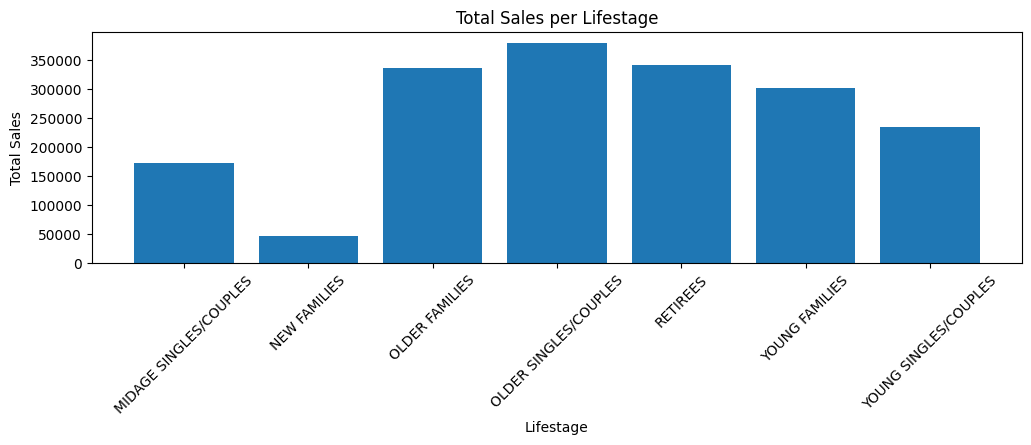

In [34]:
total_sales_per_lifestage = df_merged.groupby('LIFESTAGE')["TOT_SALES"].sum().reset_index() #group by lifestage and get the sum of sales for each lifestage

plt.figure(figsize=(12, 3))
plt.bar(total_sales_per_lifestage['LIFESTAGE'], total_sales_per_lifestage['TOT_SALES'])
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales per Lifestage')
plt.xticks(rotation=45) 

plt.show()

`TOT_SALES` per  `PREMIUM_CUSTOMER`

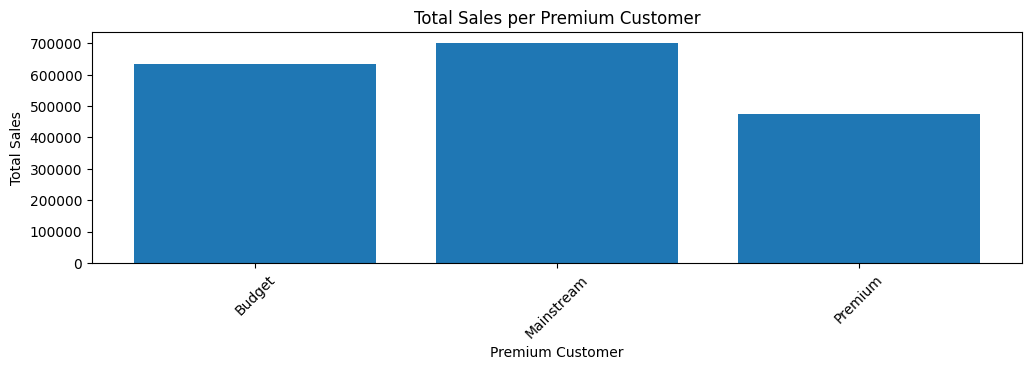

In [35]:
total_sales_per_premium = df_merged.groupby('PREMIUM_CUSTOMER')["TOT_SALES"].sum().reset_index() #group by premium customer and get the sum of sales for each category

plt.figure(figsize=(12, 3))
plt.bar(total_sales_per_premium['PREMIUM_CUSTOMER'], total_sales_per_premium['TOT_SALES'])
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales per Premium Customer')
plt.xticks(rotation=45) 

plt.show()

`TOT_SALES` per `BRAND_NAME`

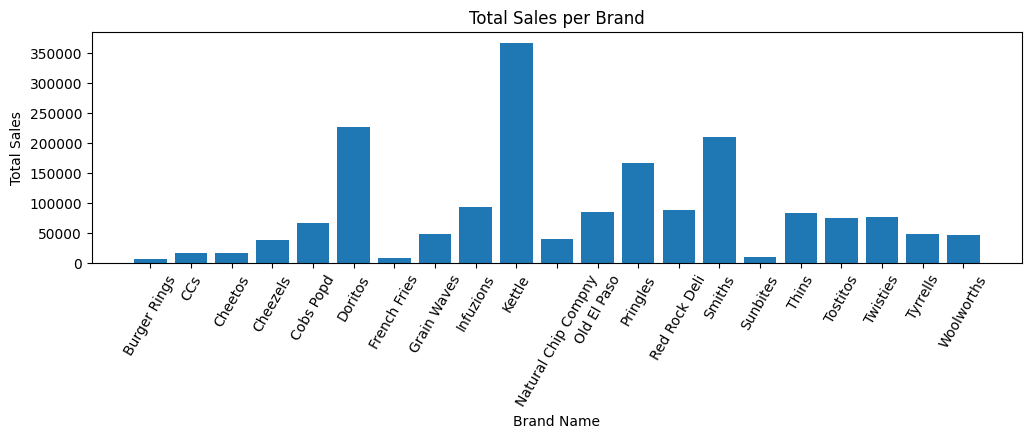

In [36]:
total_sales_per_brand = df_merged.groupby('BRAND_NAME')["TOT_SALES"].sum().reset_index() #group by brand name and get the sum of sales for each brand

plt.figure(figsize=(12, 3))
plt.bar(total_sales_per_brand['BRAND_NAME'], total_sales_per_brand['TOT_SALES'])
plt.xlabel('Brand Name')
plt.ylabel('Total Sales')
plt.title('Total Sales per Brand')
plt.xticks(rotation=60)  

plt.show()

Some keys findings are that new families have much lower total sales compared to the other lifestyle groups, and older people tend to have higher total sales. For the premium customer category, we can see that mainstream customers have the highest total sales, and premium has the lowest. For the brands Kettle, Doritos, and Smiths have the highest total sales. Burger Rings, French Fries, and Sunbites have the lowest total sales. 

Find top sales

In [37]:
# Group by 'BRAND_NAME', 'LIFESTAGE', and 'PREMIUM_CUSTOMER' to sum total sales
sales_by_group = df_merged.groupby(['BRAND_NAME', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort the results in descending order
sales_by_group = sales_by_group.sort_values(by='TOT_SALES', ascending=False)

# Display the top 15 sales combinations
sales_by_group.head(15)


,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
208,Kettle,YOUNG SINGLES/COUPLES,Mainstream,32303.6
195,Kettle,OLDER FAMILIES,Budget,30723.6
202,Kettle,RETIREES,Mainstream,29794.4
198,Kettle,OLDER SINGLES/COUPLES,Budget,27586.8
200,Kettle,OLDER SINGLES/COUPLES,Premium,26361.8
204,Kettle,YOUNG FAMILIES,Budget,25326.8
199,Kettle,OLDER SINGLES/COUPLES,Mainstream,25294.0
201,Kettle,RETIREES,Budget,22596.8
300,Smiths,OLDER FAMILIES,Budget,20712.2
124,Doritos,YOUNG SINGLES/COUPLES,Mainstream,20057.8


Kettle has the top sales, mostly with mainstream and budget customers that are young families or older

Stacked bar charts of customer segmentation by brand

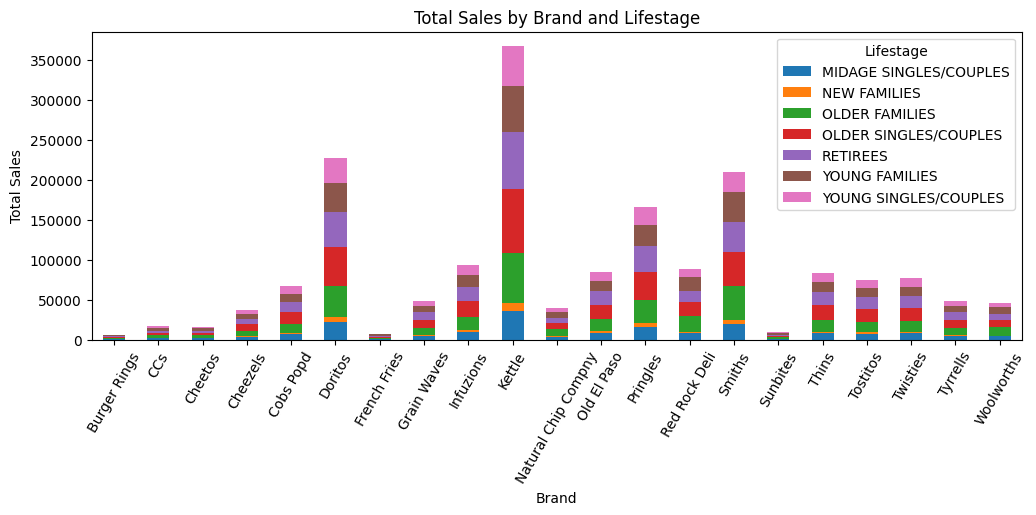

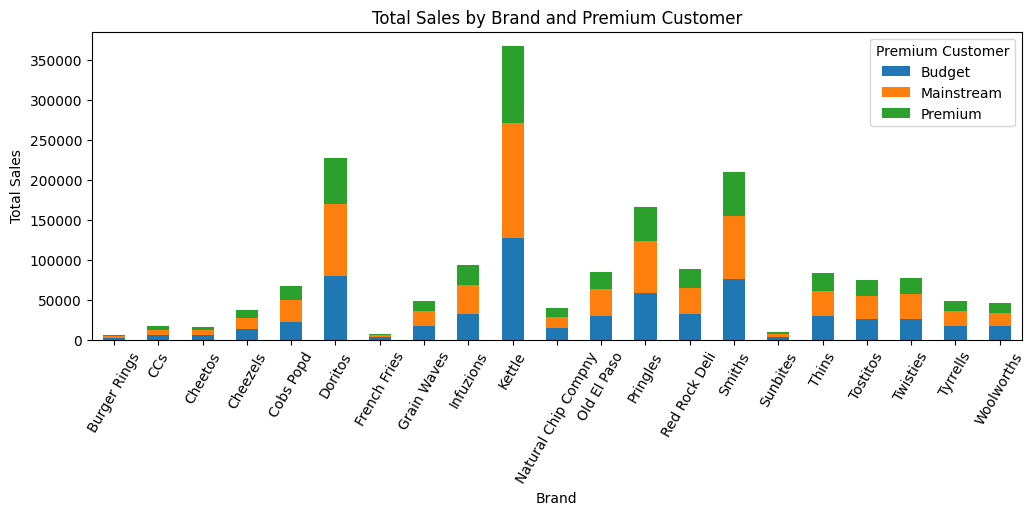

In [38]:
# Group by brand name and lifestage and calculate total sales
sales_by_brand_lifestage = df_merged.groupby(['BRAND_NAME', 'LIFESTAGE'])['TOT_SALES'].sum().unstack()

# Stacked bar chart for each brand
sales_by_brand_lifestage.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand and Lifestage')
plt.xticks(rotation=60)
plt.legend(title='Lifestage', loc='upper right')
plt.show()

# Group by brand name and premium customer and calculate total sales
sales_by_brand_premium = df_merged.groupby(['BRAND_NAME', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

# Stacked bar chart for each brand
sales_by_brand_premium.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand and Premium Customer')
plt.xticks(rotation=60)
plt.legend(title='Premium Customer', loc='upper right')
plt.show()

For the brands with the top total sales, young people and young families, along with older people are contributing the most towards the sales. Mainstream and budget customers are also contributing more than premium customers. 

Interaction effects between customer segmentation and brand --> and their correlation

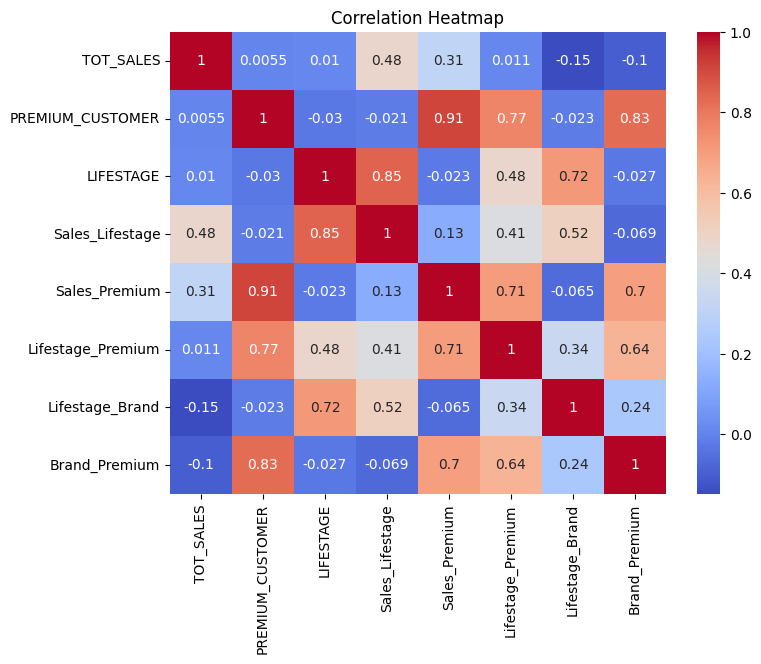

In [39]:
# Use cat.codes to create numerical encodings of the categorical features so that we can do correlation analysis
df_encoded = df_merged.copy()
df_encoded['PREMIUM_CUSTOMER'] = df_encoded['PREMIUM_CUSTOMER'].astype('category').cat.codes
df_encoded['LIFESTAGE'] = df_encoded['LIFESTAGE'].astype('category').cat.codes
df_encoded['BRAND_NAME'] = df_encoded['BRAND_NAME'].astype('category').cat.codes

# Calculate interactions between the features
df_encoded['Sales_Lifestage'] = df_encoded['TOT_SALES'] * df_encoded['LIFESTAGE']
df_encoded['Sales_Premium'] = df_merged['TOT_SALES'] * df_encoded['PREMIUM_CUSTOMER']
df_encoded['Lifestage_Premium'] = df_encoded['LIFESTAGE'] * df_encoded['PREMIUM_CUSTOMER']
df_encoded['Lifestage_Brand'] = df_encoded['LIFESTAGE'] * df_encoded['BRAND_NAME']
df_encoded['Brand_Premium'] = df_encoded['BRAND_NAME'] * df_encoded['PREMIUM_CUSTOMER']

# Calculate correlation
corr_matrix = df_encoded[['TOT_SALES', 'PREMIUM_CUSTOMER', 'LIFESTAGE','Sales_Lifestage', 'Sales_Premium', 'Lifestage_Premium', 'Lifestage_Brand', 'Brand_Premium' ]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#formatting the heatmap was helped with this source: https://stackoverflow.com/questions/39409866/correlation-heatmap


Mostly positive correlation between the interactions. Notably negative correaiton between lifestage_brand and brand_premium with total sales

Pareto chart of total sales by brand

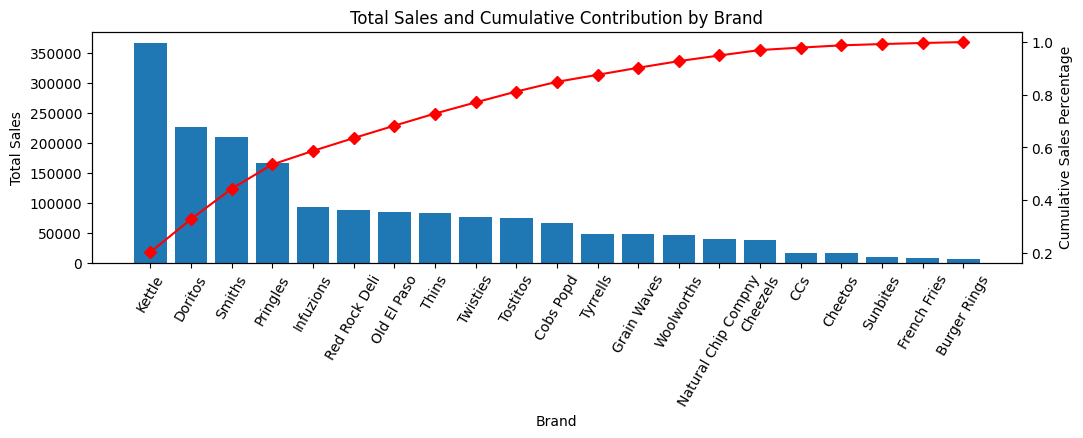

In [40]:
# Sort the brands by total sales in descending order
brand_sales_sorted = total_sales_per_brand.sort_values(by='TOT_SALES', ascending=False)

# Calculate cumulative sales
brand_sales_sorted['cumulative_sales'] = brand_sales_sorted['TOT_SALES'].cumsum() / brand_sales_sorted['TOT_SALES'].sum()

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 3))

ax1.bar(brand_sales_sorted['BRAND_NAME'], brand_sales_sorted['TOT_SALES']) #create a bar chart of sorted sales
ax1.set_xlabel('Brand')
ax1.set_ylabel('Total Sales')
plt.xticks(rotation=60)

ax2 = ax1.twinx()
ax2.plot(brand_sales_sorted['BRAND_NAME'], brand_sales_sorted['cumulative_sales'], color='red', marker='D') #create a line for cumulative sales
ax2.set_ylabel('Cumulative Sales Percentage')

plt.title('Total Sales and Cumulative Contribution by Brand')

plt.show()

#helped using this source: https://www.statology.org/pareto-chart-python/


From this we can see that Kettle, Doritos, Smiths, and Pringles make up over 50% of the total sales.

Pivot tables of brand and customer segmentation

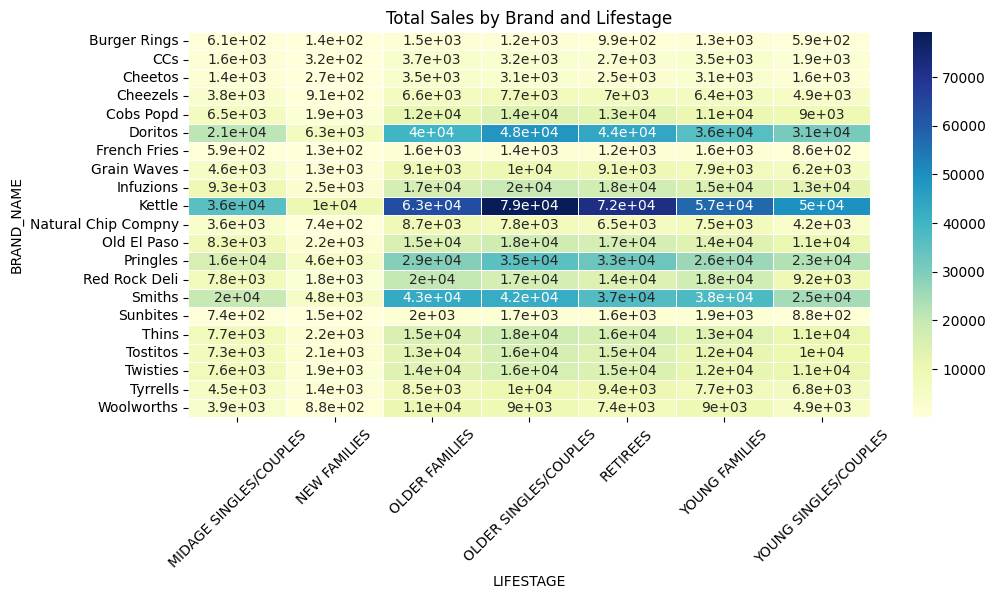

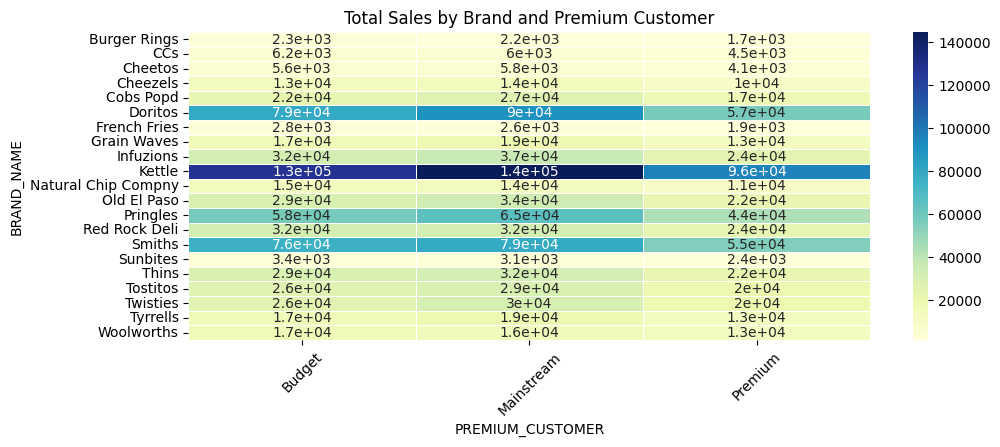

In [41]:
# Pivot table of total sales by brand and lifestage
pivot_sales_lifestage = df_merged.pivot_table(index='BRAND_NAME', columns='LIFESTAGE', values='TOT_SALES', aggfunc='sum')

# Plot as a heatmap --> numbers show total sales, colors show relative intensity
plt.figure(figsize=(11, 5))
sns.heatmap(pivot_sales_lifestage, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Brand and Lifestage')
plt.xticks(rotation=45)
plt.show()


# Total sales by brand and premium customer
pivot_sales_premium = df_merged.pivot_table(index='BRAND_NAME', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')

plt.figure(figsize=(11, 4))
sns.heatmap(pivot_sales_premium, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Brand and Premium Customer')
plt.xticks(rotation=45)
plt.show()

#helped using this documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html


Recommended strategy:

From all these results I recommend the manager focuses on selling Kettle, Doritos, Smiths, and Pringles brand chips. These brands are the drivers of sales and will help make the most money for the store. To do this, advertisements should be targeted towards older customers (older families, older singles/couples, and retirees) along with young families and young singles/couples, since these customer groups purchase the most from those top brands. Furthermore, budget and mainstream customer groups should be prioritized, since the premium group has lower total sales for the top brands. 

Determine if packet sizes are relative

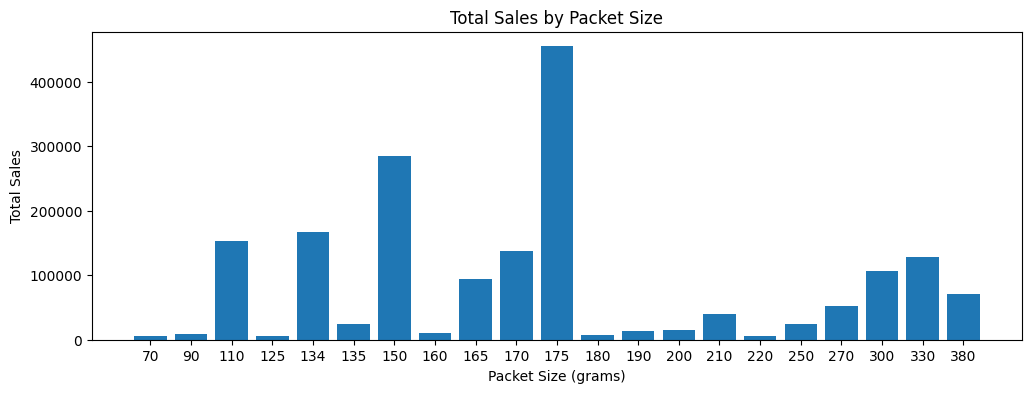

In [47]:

# Remove the grams from PACK_SIZE and save as SIZE 
df_merged['SIZE'] = df_merged['PACK_SIZE'].str.replace('g', '', case=False)

# Convert the PACK_SIZE column to numeric
df_merged['SIZE'] = pd.to_numeric(df_merged['SIZE'])

# Group total sales by packet size
sales_by_packet_size = df_merged.groupby('SIZE')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.bar(sales_by_packet_size['SIZE'].astype(str), sales_by_packet_size['TOT_SALES'])
plt.title('Total Sales by Packet Size')
plt.xlabel('Packet Size (grams)')
plt.ylabel('Total Sales')
plt.show()

175g has the largest total sales per packet size, with 150g coming in second.

In [43]:
# Compute correlation
correlation = df_merged[['SIZE', 'TOT_SALES']].corr().iloc[0, 1]
print(f"Correlation between Packet Size and Total Sales: {correlation:.2f}")

Correlation between Packet Size and Total Sales: 0.44


This means that there is a positive association between total sales

<Axes: xlabel='SIZE', ylabel='Count'>

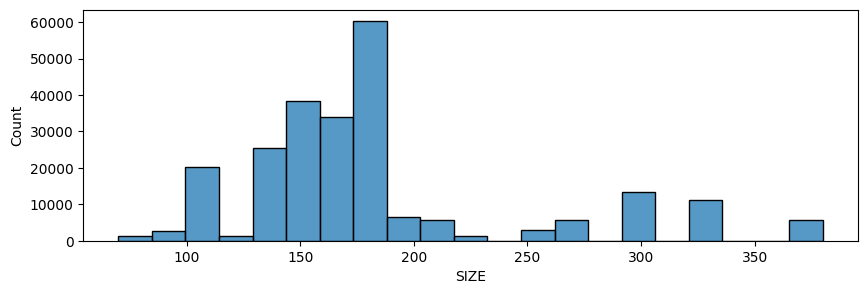

In [44]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.histplot(df_merged["SIZE"], bins=21, ax=ax)

Packet size is not evenly distributed. Most of the packets are between 100 to 200g.

The manager should prioritize packets with sizes 100g- 200g since these have the highest sales, along with the previously mentioned brands and customer segments to target.